In [ ]:
# Import des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer l'affichage de pandas pour voir plus de colonnes
pd.set_option('display.max_columns', None)

# Charger le dataset
try:
    df = pd.read_csv('online_shoppers_intention.csv')
    print("Dataset chargé avec succès !")
except FileNotFoundError:
    print("Erreur : Le fichier 'online_shoppers_intention.csv' n'a pas été trouvé.")
    print("Assurez-vous qu'il se trouve dans le même dossier que votre notebook.")
    # Quitter ou gérer l'erreur si le fichier n'est pas trouvé
    exit()

# --- 1. Compréhension Initiale des Données ---

print("\n--- Aperçu des 5 premières lignes du dataset ---")
print(df.head())

print("\n--- Aperçu des 5 dernières lignes du dataset ---")
print(df.tail())

print("\n--- Informations générales sur le dataset (types de données, valeurs non nulles) ---")
df.info()

print("\n--- Statistiques descriptives pour les colonnes numériques ---")
print(df.describe())

print("\n--- Vérification des valeurs manquantes par colonne ---")
print(df.isnull().sum())

print("\n--- Vérification des doublons ---")
print(f"Nombre de lignes dupliquées : {df.duplicated().sum()}")



Dataset chargé avec succès !

--- Aperçu des 5 premières lignes du dataset ---
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb 

In [ ]:
# Comprendre la variable cible (Target variable)
# La dernière colonne est 'Revenue', elle indique si un achat a été effectué (True) ou non (False)
# Dans notre cas, 'False' signifie un abandon de panier (pas de revenu généré)
# et 'True' signifie un achat réussi.
# Pour le problème d'abandon de panier, nous voulons prédire 'False'.
print("\n--- Distribution de la variable cible 'Revenue' ---")
print(df['Revenue'].value_counts())
print(f"Proportion de paniers abandonnés (Revenue=False) : {df['Revenue'].value_counts(normalize=True)[False]:.2f}")
print(f"Proportion d'achats finalisés (Revenue=True) : {df['Revenue'].value_counts(normalize=True)[True]:.2f}")




--- Distribution de la variable cible 'Revenue' ---
Revenue
False    10422
True      1908
Name: count, dtype: int64
Proportion de paniers abandonnés (Revenue=False) : 0.85
Proportion d'achats finalisés (Revenue=True) : 0.15


In [ ]:
# --- 2. Première Phase de Nettoyage et Préparation ---

# Gérer les valeurs manquantes
# D'après df.info() et df.isnull().sum(), il semble y avoir des valeurs manquantes
# dans 'OperatingSystems', 'Browser', 'Region', 'TrafficType'.

# Stratégie : Pour simplifier, nous allons imputer ces valeurs manquantes avec le mode (valeur la plus fréquente)
# C'est une stratégie simple pour les variables catégorielles.
for col in ['OperatingSystems', 'Browser', 'Region', 'TrafficType']:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # [0] car mode() peut retourner plusieurs modes
        df[col].fillna(mode_val, inplace=True)
        print(f"Colonnes '{col}' : Valeurs manquantes imputées avec le mode '{mode_val}'.")

print("\n--- Re-vérification des valeurs manquantes après imputation ---")
print(df.isnull().sum())

# Gérer les doublons (si présents)
if df.duplicated().any():
    initial_rows = df.shape[0]
    df.drop_duplicates(inplace=True)
    rows_after_duplicates = df.shape[0]
    print(f"\nDoublons supprimés. Nombre de lignes initiales : {initial_rows}, après suppression : {rows_after_duplicates}")
else:
    print("\nAucun doublon trouvé, ou déjà géré.")





--- Re-vérification des valeurs manquantes après imputation ---
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Doublons supprimés. Nombre de lignes initiales : 12330, après suppression : 12205



--- Visualisation de la distribution des pages vues (Administrative, Informational, ProductRelated) ---


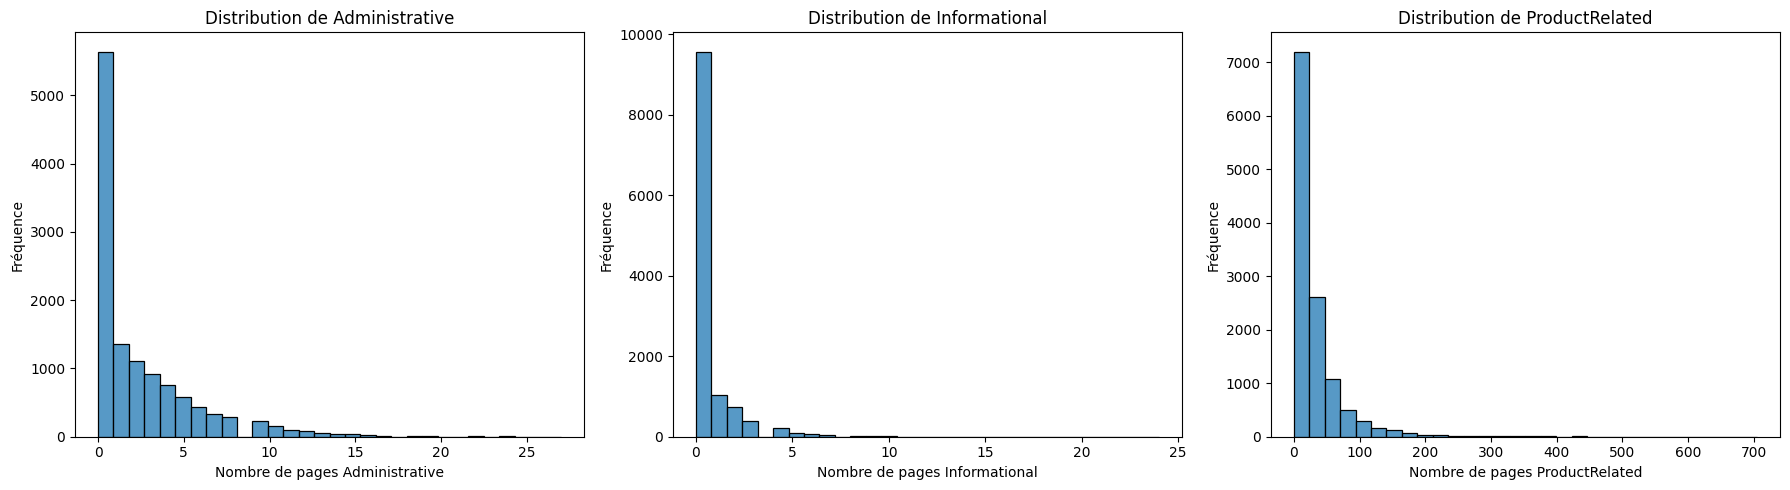

In [ ]:
# --- 3. Exploration Approfondie (Pré-traitement continuera après cette phase) ---

# Visualisation simple de quelques colonnes
print("\n--- Visualisation de la distribution des pages vues (Administrative, Informational, ProductRelated) ---")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Administrative'], bins=30, ax=axes[0])
axes[0].set_title('Distribution de Administrative')
axes[0].set_xlabel('Nombre de pages Administrative')
axes[0].set_ylabel('Fréquence')

sns.histplot(df['Informational'], bins=30, ax=axes[1])
axes[1].set_title('Distribution de Informational')
axes[1].set_xlabel('Nombre de pages Informational')
axes[1].set_ylabel('Fréquence')

sns.histplot(df['ProductRelated'], bins=30, ax=axes[2])
axes[2].set_title('Distribution de ProductRelated')
axes[2].set_xlabel('Nombre de pages ProductRelated')
axes[2].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()




--- Relation entre le temps passé et le revenu (True/False) ---


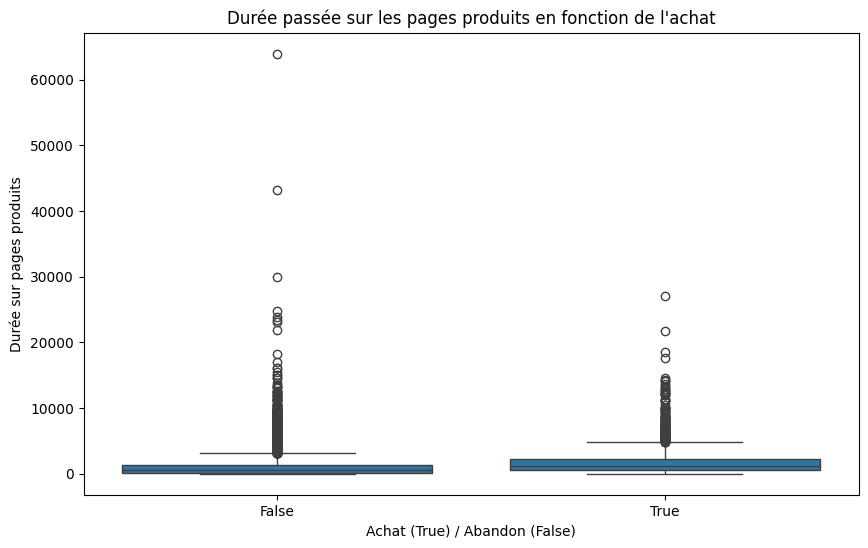

In [11]:
# Relations entre le temps passé sur les pages et la variable cible
print("\n--- Relation entre le temps passé et le revenu (True/False) ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.title('Durée passée sur les pages produits en fonction de l\'achat')
plt.xlabel('Achat (True) / Abandon (False)')
plt.ylabel('Durée sur pages produits')
plt.show()




--- Relation entre le mois et la proportion d'achats ---


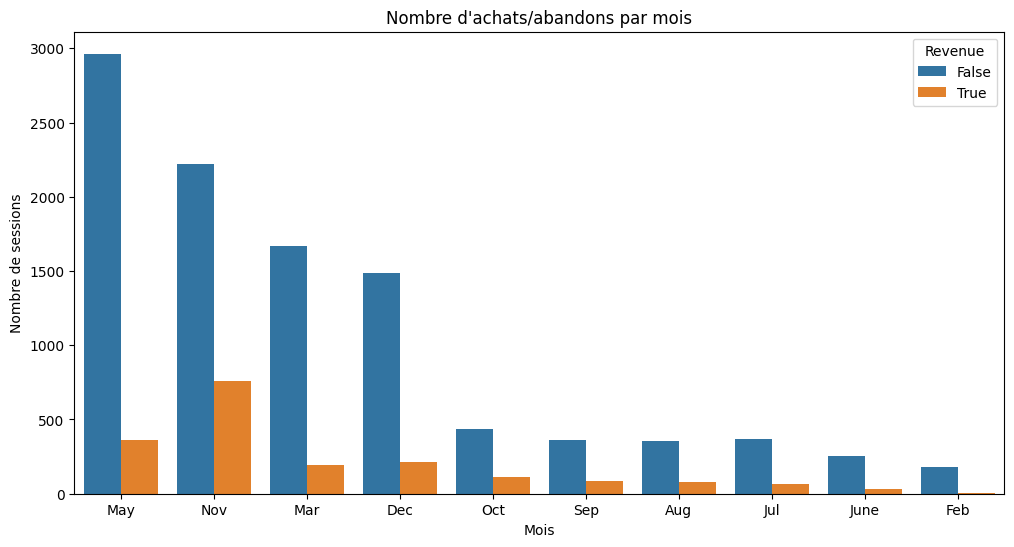

In [12]:
# Relation avec les mois
print("\n--- Relation entre le mois et la proportion d'achats ---")
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Revenue', data=df, order=df['Month'].value_counts().index)
plt.title('Nombre d\'achats/abandons par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de sessions')
plt.show()



--- Relation entre le type de trafic et la proportion d'achats ---


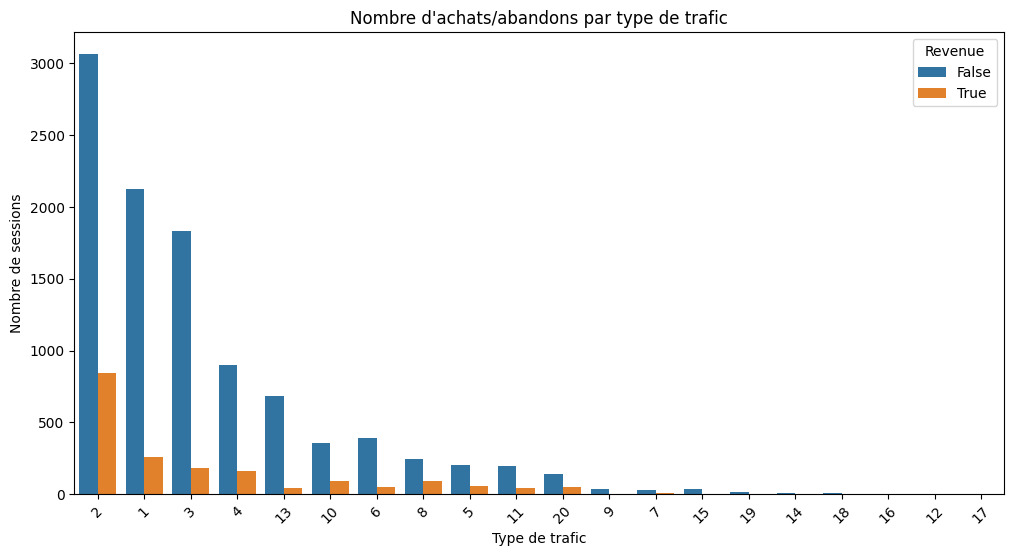


--- Nettoyage et Exploration Initiale Terminés ---
Dimensions du dataset après nettoyage : (12205, 18)


In [13]:
# Relation avec le type de trafic
print("\n--- Relation entre le type de trafic et la proportion d'achats ---")
plt.figure(figsize=(12, 6))
sns.countplot(x='TrafficType', hue='Revenue', data=df, order=df['TrafficType'].value_counts().index)
plt.title('Nombre d\'achats/abandons par type de trafic')
plt.xlabel('Type de trafic')
plt.ylabel('Nombre de sessions')
plt.xticks(rotation=45)
plt.show()

print("\n--- Nettoyage et Exploration Initiale Terminés ---")
print(f"Dimensions du dataset après nettoyage : {df.shape}")